In [89]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
sns.set_theme(style="ticks")
import scipy.stats

In [34]:
os.listdir()

['bodyfat.txt',
 '.DS_Store',
 'coolhearts.txt',
 'babybirds.txt',
 'soapsuds.txt',
 'multiple LR.ipynb',
 'iqsize.txt',
 'hospital_infct.txt',
 'pastry.txt',
 '.ipynb_checkpoints',
 'stat_females.txt']

## scatter plot matrix

In [20]:
df = pd.read_table("hospital_infct.txt", index_col=0)

In [21]:
df

,Stay,Age,InfctRsk,Culture,Xray,Beds,MedSchool,Region,Census,Nurses,Facilities
ID,,,,,,,,,,,
1,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60.0
2,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40.0
3,8.34,56.9,2.7,8.1,74.0,107,2,3,82,54,20.0
4,8.95,53.7,5.6,18.9,122.8,147,2,4,53,148,40.0
5,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40.0
...,...,...,...,...,...,...,...,...,...,...,...
109,11.80,53.8,5.7,9.1,116.9,571,1,2,441,469,62.9
110,9.50,49.3,5.8,42.0,70.9,98,2,3,68,46,22.9
111,7.70,56.9,4.4,12.2,67.9,129,2,4,85,136,62.9


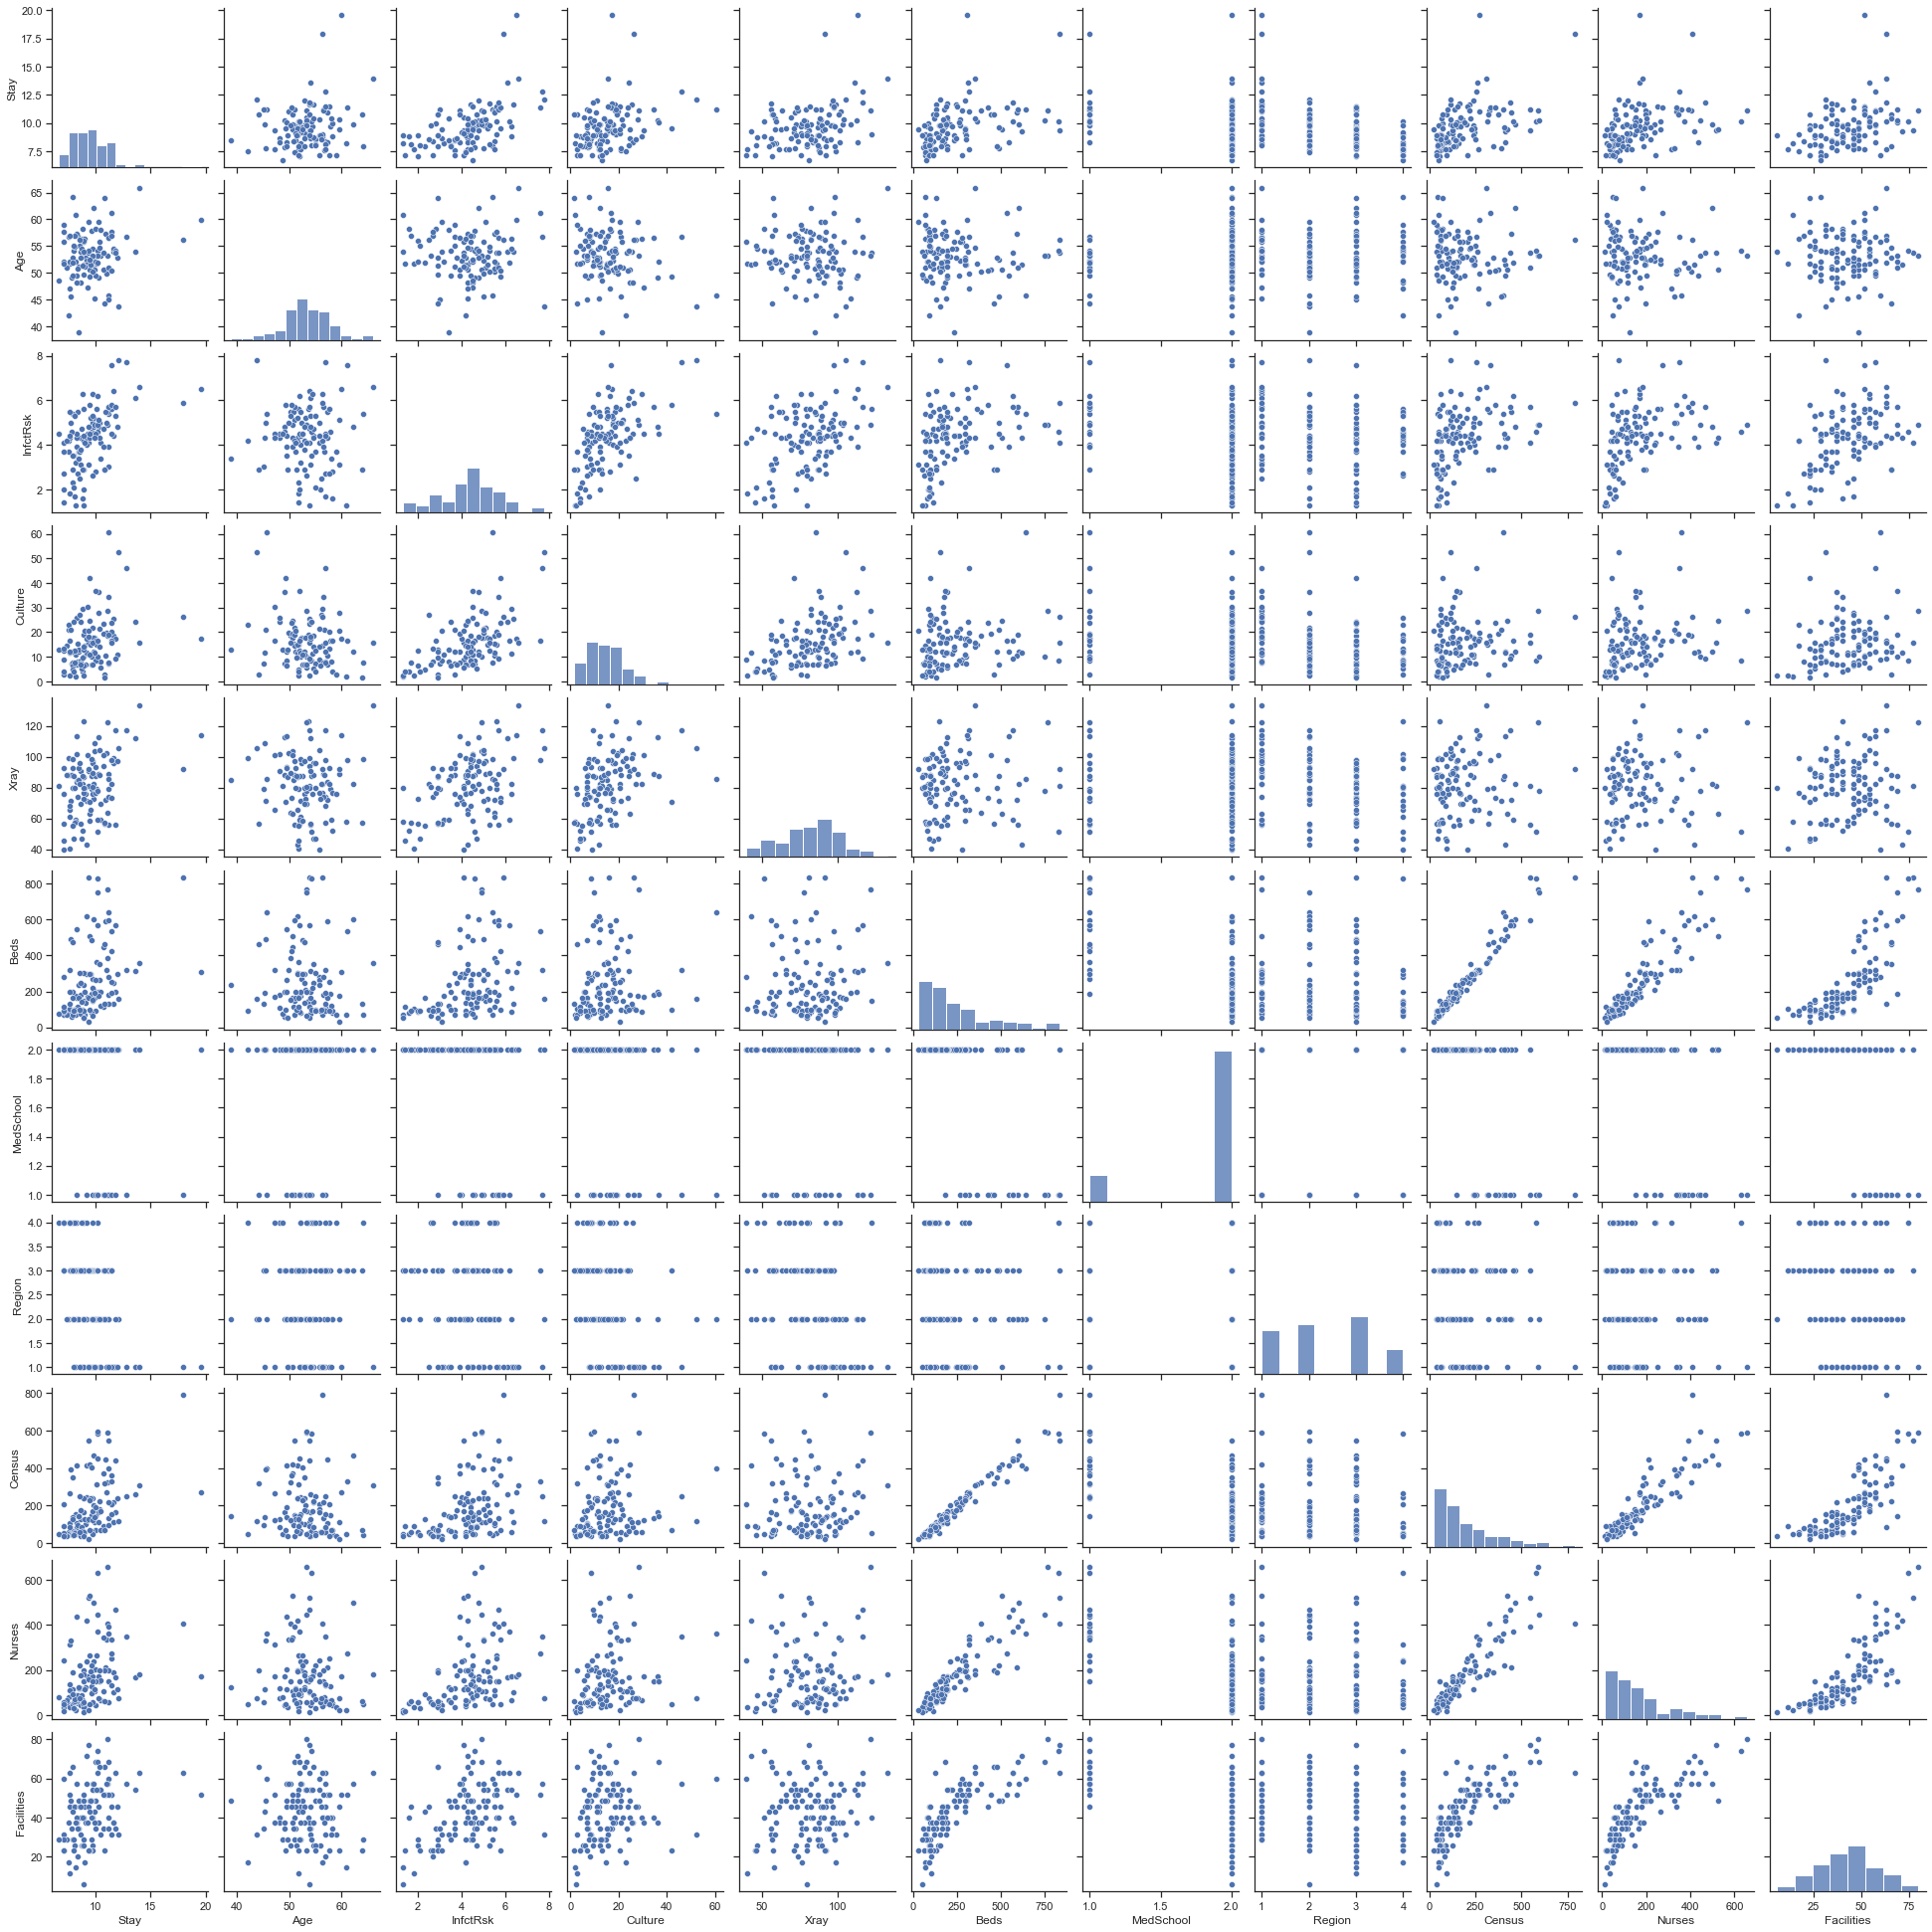

In [22]:
sns.pairplot(df)

## linear dependence

In [28]:
mat = np.matrix([
    [1,4,5],
    [2,3,5],
    [3,2,5]
])

In [29]:
mat.T @ mat

matrix([[14, 16, 30],
        [16, 29, 45],
        [30, 45, 75]])

In [33]:
np.linalg.inv(mat.T @ mat)

LinAlgError: Singular matrix

## rabbits

In [37]:
df = pd.read_table('coolhearts.txt')

In [39]:
import statsmodels.api as sm

In [40]:
X = df[['Area','X2','X3']]

In [41]:
X = sm.add_constant(X)

In [50]:
model = sm.OLS(df['Inf'], X)

In [51]:
res = model.fit()

In [52]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Inf   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     16.43
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           2.36e-06
Time:                        23:04:20   Log-Likelihood:                 19.760
No. Observations:                  32   AIC:                            -31.52
Df Residuals:                      28   BIC:                            -25.66
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1345      0.104     -1.293      0.206      -0.348       0.079
Area           0.6127      0.107      5.723      0.000       0.393       0.832
X2            -0.2435      0.062     -3.909      0.001      -0.371      -0.116
X3            -0.0657      0.065     -1.009      0.322      -0.199       0.068
==============================================================================
Omnibus:                        5.165   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                3.657
Skew:                           0.591   Prob(JB):                        0.161
Kurtosis:                       4.159   Cond. No.                         8.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### F test: is the model useful? full model vs. intercept only

In [57]:
from statsmodels.formula.api import ols

In [62]:
df = df.rename(columns={'Inf':'y'})

In [74]:
df['intercept'] = 1

In [75]:
model = ols('y ~ intercept + Area + X2 + X3', data=df).fit()

In [76]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
intercept,1.0,0.064210,0.064210,3.299412,0.080026
Area,1.0,0.580754,0.580754,29.841870,0.000008
X2,1.0,0.298620,0.298620,15.344490,0.000524
X3,1.0,0.018497,0.018497,0.950483,0.337945
Residual,28.0,0.544910,0.019461,NaN,NaN


#### (SSE(R) - SSE(F)) / (df(R) - df(F)) / (SSE(F) / df(F))

$$\frac{\frac{SSE(R)-SSE(F)}{df(R)-df(F)}}{\frac{SSE(F)}{df(F)}}$$

In [86]:
model_reduced = ols('y ~ intercept', data=df).fit()
sm.stats.anova_lm(model_reduced)

,df,sum_sq,mean_sq,F,PR(>F)
intercept,1.0,0.064210,0.064210,1.323318,0.258794
Residual,31.0,1.504182,0.048522,NaN,NaN


In [87]:
(1.504182 - 0.544910) / (31 - 28) / (0.544910 / 28)

16.430613006429194

In [88]:
print('df1:{}, df:{}'.format(31-28, 28))

df1:3, df:28


In [90]:
scipy.stats.f.ppf(q=1-0.05, dfn=3, dfd=28)

2.9466852660172655

#### General linear F-test: Does cooling matter?

In [91]:
model_reduced = ols('y ~ intercept + Area', data=df).fit()
sm.stats.anova_lm(model_reduced)

,df,sum_sq,mean_sq,F,PR(>F)
intercept,1.0,0.064210,0.064210,2.190828,0.149261
Area,1.0,0.580754,0.580754,19.815164,0.000109
Residual,30.0,0.879257,0.029309,NaN,NaN


In [92]:
(0.879257 - 0.544910) / (30 - 28) / (0.544910 / 28)

8.590148831917196

In [93]:
scipy.stats.f.ppf(q=1-0.05, dfn=2, dfd=28)

3.340385558237759

## Residual Plot

In [99]:
model = ols('y ~ intercept + Area + X2 + X3', data=df).fit()

<AxesSubplot:>

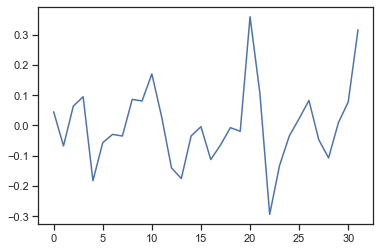

In [104]:
pd.Series(model.resid).plot()

## Tests for Error Normality

In [105]:
# https://blog.minitab.com/en/the-statistical-mentor/anderson-darling-ryan-joiner-or-kolmogorov-smirnov-which-normality-test-is-the-best

In [106]:
scipy.stats.anderson(model.resid)

AndersonResult(statistic=0.511677727204777, critical_values=array([0.523, 0.596, 0.715, 0.834, 0.992]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [108]:
scipy.stats.shapiro(model.resid)

ShapiroResult(statistic=0.9537534713745117, pvalue=0.18406759202480316)

## Tests for Equal Variance

In [112]:
import statsmodels.stats.api as sms

In [115]:
sms.het_breuschpagan(model.resid, model.model.exog)

(1.572984793515598, 0.8136392002079803, 0.4825051457238183, 0.6971021193521192)

In [ ]:
# The second is p-value
# very big, can't reject the null hypothesis 
# can't say there exists heteroskedasticity
# it is equal variance